In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)


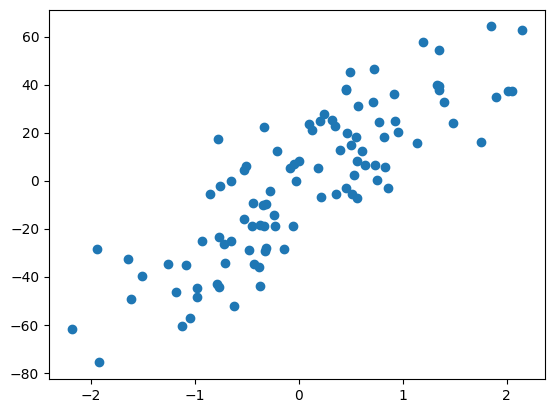

In [3]:
plt.scatter(X,y)


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)


[24.9546267]
-2.1269130035235735


In [8]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


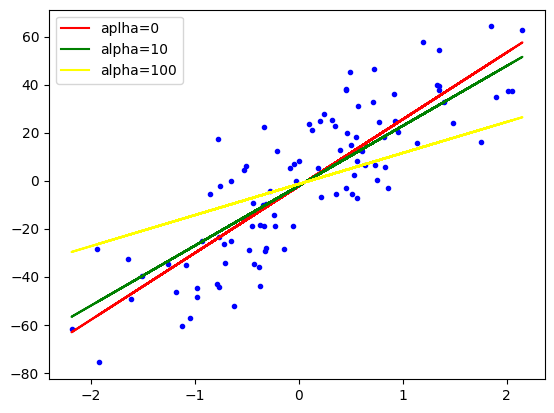

In [10]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='aplha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='yellow',label='alpha=100')
plt.legend()

In [16]:
# ridge regression from scratch for 2D data
class meraRidge:
    def __init__(self,alpha=1):
        self.b=None
        self.m=None
        self.alpha = alpha
    def fit(self,x_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + (y_train-np.mean(y_train))*(X_train - np.mean(X_train))
            den = den + (X_train - np.mean(X_train))*(X_train - np.mean(X_train))
        self.m = num/(den+ alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    def predict(X_test):
        pass

In [17]:
reg = meraRidge(alpha=100)

In [18]:
reg.fit(X,y)

NameError: name 'X_train' is not defined

In [53]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [54]:
X,y = load_diabetes(return_X_y=True)


In [55]:
from sklearn.model_selection import train_test_split


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [46]:
from sklearn.linear_model import Ridge


In [47]:
reg = Ridge(alpha=0.1,solver='cholesky')


In [48]:
reg.fit(X_train,y_train)


Ridge(alpha=0.1, solver='cholesky')

In [49]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [50]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [74]:
class MeraRidge:
    
    def __init__(self,alpha=0.1): 
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_=result[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+self.intercept_
        

In [75]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)


0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281


In [79]:
def reversee(arr):
    for i in range(len(arr)):
        arr[-1-i],arr[i]=arr[i],arr[-1-i]
        return arr

reversee([1,2,3,4,5,6,8,7,33])

[33, 2, 3, 4, 5, 6, 8, 7, 1]